<a href="https://colab.research.google.com/github/AshTayade/Kaggle_Higgs_bosson/blob/main/sem2_project_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook2: Random forest

## We start by importing our data from pickle files 

In [ ]:
#importing libraries
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from matplotlib import colors
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn import metrics,preprocessing, tree
import pickle
import time


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/MyDrive/Higgs_boson/best_DT.pickle'
best_DT = pickle.load(open(filename, 'rb'))



In [ ]:
best_DT

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
filename = '/content/drive/MyDrive/Higgs_boson/list_dataset.pickle'
dataset_list = pickle.load(open(filename, 'rb'))
X_train =dataset_list[0]
y_train  =dataset_list[1]
X_test = dataset_list[2]
y_test =dataset_list[3]

In [ ]:
#prediction = best_DT.predict(X_test)

In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test,prediction)

0.8218

# Ensemble Models

### Ensemble Techniques are of two types namely bagging and boosting. In interest of time and processing power we decided to pick one model from each techinque. Random forest and Adaboost respectively.



### Random forest with OOB instead of cross validation is choosen since it is faster and better with large dataset. Combining bagging with random forest will solve the problem of one feature dominating due to decorelation created by random forest.(as random forest will choose sqr(p) features randomly to split). If we just bag trees and suppose we have a extremly strong predictor and other predictors are moderate. Then greedy ensures that most of the models in ensemble will choose to split on the dominant predictor. Hence we choose random forest with bagging 


### We tried a few estimators in different notebooks and found out 100 or 300 work best with our data and final hyperparameter tunning is been done with those estimators 

In [ ]:
RF_model =  RandomForestClassifier(oob_score = True)#random forest object

In [ ]:
parameters = { 'max_depth':[3,6,11],
              'n_estimators':[100,300],
              'min_samples_leaf':[2,3]}

In [ ]:
scorer = make_scorer(accuracy_score)

In [ ]:
grid_obj =  GridSearchCV(RF_model, parameters, scoring= scorer, n_jobs= -1)# gridsearchcv object

In [ ]:
start_time = time.time()                            #fiting the grid on training data
grid_fit = grid_obj.fit(X_train, y_train)
stop_time = time.time()
print("Code started at : ",time.ctime(start_time))
print("Code started at : ",time.ctime(stop_time))
print("Total time taken : ",((stop_time-start_time)/60),"minutes")

Code started at :  Wed Apr 14 07:45:56 2021
Code started at :  Wed Apr 14 08:44:20 2021
Total time taken :  58.40635882218679 minutes


In [ ]:
best_RF = grid_fit.best_estimator_

In [ ]:
best_RF# our best random forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_RF= best_RF.predict(X_test)

In [ ]:
accuracy_score(y_test,pred_RF)

0.83156

### Our accuracies with baseline models were 76.7% and 82% and Random forest has an accuracy of 83% which is an improvement


### Pickling the best estimator we got from gridsearchcv (best random forest model)

In [ ]:
filename = '/content/drive/MyDrive/Higgs_boson/best_RF.pickle'
with open(filename, 'wb') as f:
  pickle.dump(best_RF,f)

In [ ]:
filename = '/content/drive/MyDrive/Higgs_boson/grid_fit.pickle'
with open(filename, 'wb') as f:
  pickle.dump(grid_fit,f)

## SMOTE to upsample 

Random forest is not largely affected by imbalance in the data but we want to see the accuracy after we upsample

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_SMOTE = pd.DataFrame(X_train_SMOTE)

print(df_SMOTE)
print(type(df_SMOTE))


                0          1          2   ...          20          21          22
0       110.810000  10.320000  51.310000  ...  143.581000  127.067000  270.648000
1       130.500000  23.935000  96.246000  ...   41.536000 -999.000000   41.536000
2       110.048000  46.705000  74.705000  ...   75.850000 -999.000000   75.850000
3      -999.000000  74.190000  46.641000  ... -999.000000 -999.000000    0.000000
4       115.316000  10.205000  63.730000  ...  180.378000 -999.000000  180.378000
...            ...        ...        ...  ...         ...         ...         ...
230061  129.217130  46.805929  99.915322  ...  116.913173 -999.000000  116.913173
230062  104.425225   4.096135  73.300184  ...   37.390994 -999.000000   37.390994
230063  115.579274  24.365426  74.927577  ...  141.169642   54.030176  195.199279
230064   89.897743   8.996383  58.180819  ...   36.082619 -999.000000   36.082619
230065   82.858988  25.253031  56.292356  ... -999.000000 -999.000000    0.000000

[230066 rows x 

In [ ]:
df1_SMOTE = pd.DataFrame(y_train_SMOTE, columns=['Label'])

print(df1_SMOTE)
print(type(df1_SMOTE))

        Label
0           1
1           1
2           1
3           0
4           1
...       ...
230061      1
230062      1
230063      1
230064      1
230065      1

[230066 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
frames = [df_SMOTE,df1_SMOTE]
Xy_train_SMOTE = pd.concat(frames,axis =1)

In [ ]:
Xy_train_SMOTE.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,Label
0,110.810,10.320,51.310,263.392,2.888,545.566,0.903,7.807,381.077,0.952,1.403,56.581,-0.236,-2.393,53.849,0.629,-2.653,153.901,-2.539,2.0,143.581,127.067,270.648,1
1,130.500,23.935,96.246,44.201,-999.000,-999.000,2.498,3.385,135.355,0.868,1.397,50.235,0.335,2.396,43.584,1.227,-1.554,6.898,-3.077,1.0,41.536,-999.000,41.536,1
2,110.048,46.705,74.705,88.036,-999.000,-999.000,1.881,17.398,160.549,1.085,1.228,40.630,-0.463,-0.955,44.069,0.525,-2.556,32.411,-1.224,1.0,75.850,-999.000,75.850,1
3,-999.000,74.190,46.641,1.646,-999.000,-999.000,1.714,1.646,49.912,1.448,-1.384,20.393,-0.834,-2.848,29.519,0.816,2.972,47.004,0.012,0.0,-999.000,-999.000,0.000,0
4,115.316,10.205,63.730,180.405,-999.000,-999.000,1.644,0.128,263.332,2.807,0.832,21.791,-1.682,0.638,61.162,-0.249,1.444,104.993,1.571,1.0,180.378,-999.000,180.378,1


Text(0.5, 1.0, 'Distribution of signal and background')

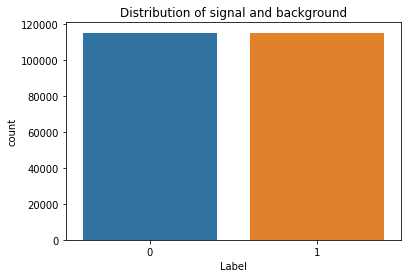

In [ ]:
sns.countplot(x='Label' , data =Xy_train_SMOTE)
plt.title('Distribution of signal and background') # to see the distribuation of target variable 

From the above graph, we can observe that the data is balanced.

In [ ]:
dataset_SMOTE = pickle.load(open('list_dataset_SMOTE/list_dataset_SMOTE.pickle', 'rb'))
type(dataset_SMOTE)

list

In [ ]:
type(dataset_SMOTE[0])

pandas.core.frame.DataFrame

In [ ]:
dataset_SMOTE[0].head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,110.810,10.320,51.310,263.392,2.888,545.566,0.903,7.807,381.077,0.952,...,-2.393,53.849,0.629,-2.653,153.901,-2.539,2.0,143.581,127.067,270.648
1,130.500,23.935,96.246,44.201,-999.000,-999.000,2.498,3.385,135.355,0.868,...,2.396,43.584,1.227,-1.554,6.898,-3.077,1.0,41.536,-999.000,41.536
2,110.048,46.705,74.705,88.036,-999.000,-999.000,1.881,17.398,160.549,1.085,...,-0.955,44.069,0.525,-2.556,32.411,-1.224,1.0,75.850,-999.000,75.850
3,-999.000,74.190,46.641,1.646,-999.000,-999.000,1.714,1.646,49.912,1.448,...,-2.848,29.519,0.816,2.972,47.004,0.012,0.0,-999.000,-999.000,0.000
4,115.316,10.205,63.730,180.405,-999.000,-999.000,1.644,0.128,263.332,2.807,...,0.638,61.162,-0.249,1.444,104.993,1.571,1.0,180.378,-999.000,180.378


In [ ]:
dataset_SMOTE[1].head()

,Label
0,1
1,1
2,1
3,0
4,1


In [ ]:
dataframe_Xtrain_Smote=dataset_SMOTE[0]
dataframe_Ytrain_Smote=dataset_SMOTE[1]

In [ ]:
start_time = time.time()
grid_fit_SMOTE = grid_obj.fit(dataframe_Xtrain_Smote,dataframe_Ytrain_Smote)
stop_time = time.time()
print("Code started at : ",time.ctime(start_time))
print("Code started at : ",time.ctime(stop_time))
print("Total time taken : ",((stop_time-start_time)/60),"minutes")

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Code started at :  Wed Apr 14 20:22:30 2021
Code started at :  Wed Apr 14 20:52:14 2021
Total time taken :  29.745093762874603 minutes


In [ ]:
dataset_list = pickle.load(open('list_dataset/list_dataset.pickle', 'rb'))
X_test = dataset_list[2]
y_test =dataset_list[3]

In [ ]:
best_RF_SMOTE = grid_fit_SMOTE.best_estimator_

In [ ]:
best_RF_SMOTE

RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=300,
                       oob_score=True)

In [ ]:
pred_RF_SMOTE= best_RF_SMOTE.predict(X_test)

In [ ]:
accuracy_score(y_test,pred_RF_SMOTE)

0.8180666666666667

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_RF_SMOTE , average='weighted')


0.820990200722813

The f1_score acheived for Random Forest after SMOTE is 82.09.